# Notebook Imports

In [1]:
import os, sys

from os import walk
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

# Constants

In [2]:
SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500               # V reálnom svete by to malo byť prvých 5 - 15 tis. najčastejších slov

TOKEN_SPAM_PROB_FILE = 'static\\SpamData\\03_Testing\\prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'static\\SpamData\\03_Testing\\prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'static\\SpamData\\03_Testing\\prob-all-token.txt'

TEST_FEATURE_MATRIX = 'static\\SpamData\\03_Testing\\test-features.txt'
TEST_TARGET_FILE = 'static\\SpamData\\03_Testing\\test-target.txt'

WHALE_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\whale-icon.png'
SKULL_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\skull-icon.png'
THUMBS_UP_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\thumbs-up.png'
THUMBS_DOWN_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\thumbs-down.png'
FONT_BOLD_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\OpenSansCondensed-Bold.ttf'
FONT_LIGHT_FILE = 'static\\SpamData\\01_Processing\\wordcloud_resources\\OpenSansCondensed-Light.ttf'

# Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### The Dot Product

In [5]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])

print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [6]:
a.dot(b)

22

In [7]:
# Ako sme dostali dot product 2 vektorov ? 
1*0 + 2*5 + 3*4


22

In [8]:
c = np.array([[0,6], [3,0], [5,1]])
print('Shape of c is ', c.shape)
print(c)

Shape of c is  (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [9]:
print(a.dot(c))
print ('Shape of the dot product is ', a.dot(c).shape)

[21  9]
Shape of the dot product is  (2,)


**Challenge:** Can you figure out the dimensions of the dot product between X_test and prob_token_spam ?

In [10]:
print('X_test shape is: ', X_test.shape)
print('prob_token_spam shape is: ', prob_token_spam.shape)
print('Shape of the dot product X_test and prob_token_spam shape is: ', X_test.dot(prob_token_spam).shape)

X_test shape is:  (1724, 2500)
prob_token_spam shape is:  (2500,)
Shape of the dot product X_test and prob_token_spam shape is:  (1724,)


## Set the Prior


$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X}$$

In [11]:
PROB_SPAM = 0.3116

**Challenge:** Ako urobím log numpy array? Vypočítajte logaritmické pravdepodobnosti tokenov za predpokladu, že e-mail bol spam (uložené v prob_roken_spam.

In [12]:
np.log(prob_token_spam)

array([ -4.40759195,  -5.25366675,  -4.99006919, ...,  -9.26099994,
        -9.38616308, -11.4010661 ])

## Joint probability in log format


Ideme skombinovať the joint probability and the conditional probability. Ideme vypočítať pravdepodobnosť, že e-mail je spam vzhľadom na token: joint_log_spam


In [13]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)-np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [14]:
joint_log_spam[:5]

array([24.28360787,  2.16305488, 20.59344354, 17.75865473, 20.51721085])

**Challenge:** Calculate the log probability that the emails are non-spam given their tokens. Store the result in a variable called joint_log_ham

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

**Výraz:** (1-P(Spam)) = pravdepodobnosť, že imail nie je spam!

In [15]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [16]:
joint_log_ham[:5]

array([-60.9732416 , -11.01142777, -37.96955526, -59.13793992,
       -53.80718869])

In [17]:
joint_log_ham.size

1724

# Making Predictions


### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
**<center>OR</center>**
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

**Challenge:** Can you create the vector of predictions, our $\hat y$ ? Remember that spam emails should have the value 1 (true) and non-spam emails should have the value 0 (false). Store results in a variable called prediction.

In [18]:
prediction = joint_log_spam > joint_log_ham

In [19]:
prediction[-5:]

array([ True, False, False, False, False])

In [20]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

In [21]:
prediction[5:20]*1

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
y_test[5:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Simplify


$$P(Spam \, | \, X) ≠ \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

Ale vzťah medzi Ham a Spam sa nemení....
$$\frac{P(X \, | \, Ham) \, P(Ham)} {P(X)} <> \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [23]:
# P(X) in on both sides, so mathematically could be deleted by multipliyng both sides by P(X)

joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

# Metrics and Evaluation

### Accuracy

In [24]:
# Vychádzame z toho, že set Y má uložené maily aj s ich reálnou klasifikáciou.... Porovnáme

correct_docs = (y_test == prediction).sum()
print('Docs classified correctly = ', correct_docs)

numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly = ', numdocs_wrong)

Docs classified correctly =  1685
Docs classified incorrectly =  39


In [25]:
# Accuracy

correct_docs/len(X_test)

0.9773781902552204

In [26]:
fraction_wrong = numdocs_wrong/len(X_test)

print('Franction classified incorrectly = {:.2%}'.format(fraction_wrong))
print('Accuracy of the model = {:.2%}'.format(1-fraction_wrong))

Franction classified incorrectly = 2.26%
Accuracy of the model = 97.74%


## Visualising the Results

In [27]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

# K decision boundary
linedata = np.linspace(start=-14000, stop=1, num=1000)

<function matplotlib.pyplot.show(close=None, block=None)>

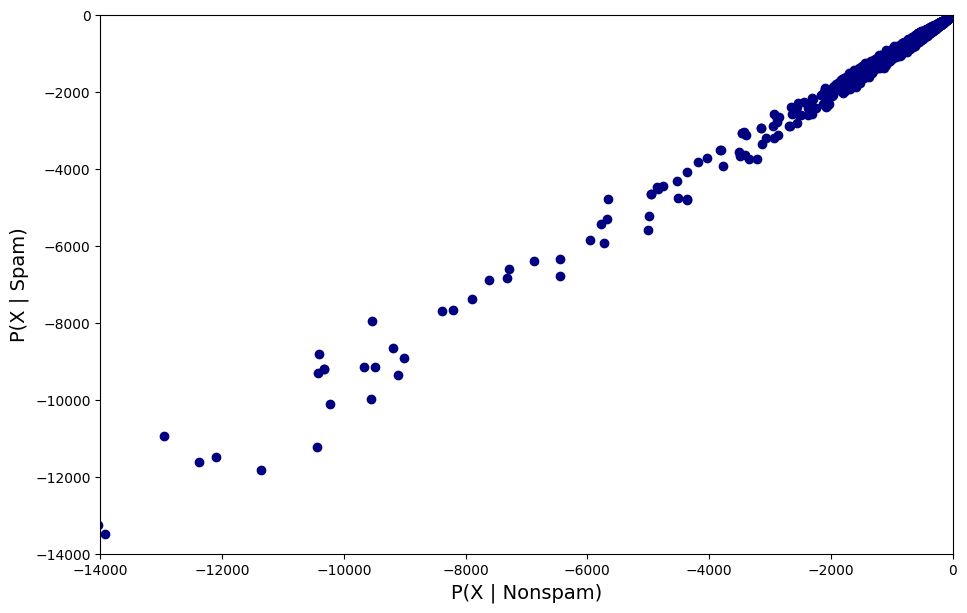

In [28]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show

## Decission Boundary

<function matplotlib.pyplot.show(close=None, block=None)>

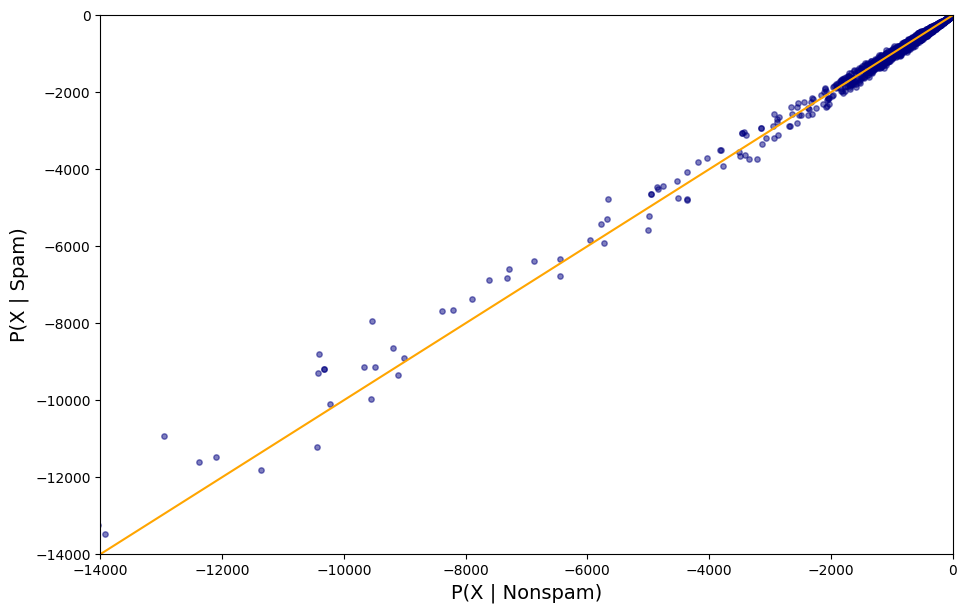

In [29]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=15)
plt.plot(linedata, linedata, color='orange')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

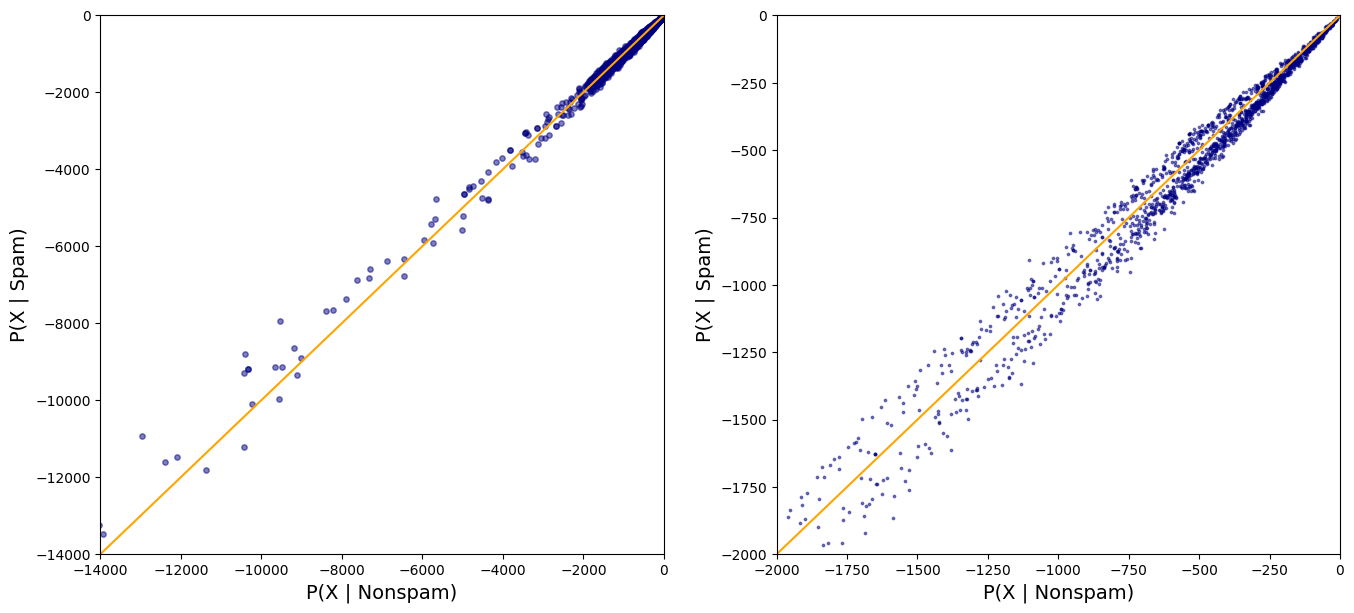

In [30]:
plt.figure(figsize=(16,7))

# Chart Nr. 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set scale
plt.xlim([-14000,1])
plt.ylim([-14000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=15)
plt.plot(linedata, linedata, color='orange')

# Chart Nr. 1
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)

# Set scale
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')


plt.show

In [31]:
# Chart Styling Seaborn

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})

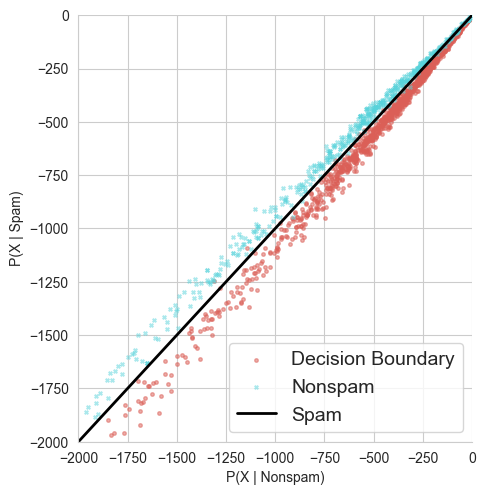

In [32]:
lm = sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.5, "s": 6.5}, fit_reg=False,
                hue=labels, markers=['o','x'], palette='hls', legend=False)

lm.set(xlim=(-2000, 1))
lm.set(ylim=(-2000, 1))

# Pridanie lineárnej čiary do grafu
# 1. spôsob
"""for ax in lm.axes.flat:
    ax.axline((-2000, -2000), (0, 0), linewidth=2, color='r')
"""
# 2. spôsob
plt.plot(linedata, linedata, linewidth=2, color='black')


# Doplníme vlastnú legend
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)


plt.show()

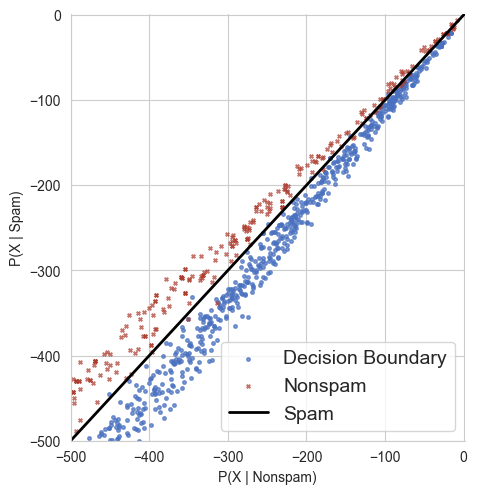

In [33]:
# Pohráme sa s vlastnými farbami a nastavbenmiami grafu
my_colours = ['#4A71C0', '#AB3A2C']
lm = sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, scatter_kws={'alpha':0.7, "s": 6.5}, fit_reg=False,
                hue=labels, markers=['o','x'], palette=my_colours, legend=False)

lm.set(xlim=(-500, 1))
lm.set(ylim=(-500, 1))

# Pridanie lineárnej čiary do grafu
# 1. spôsob
"""for ax in lm.axes.flat:
    ax.axline((-2000, -2000), (0, 0), linewidth=2, color='r')
"""
# 2. spôsob
plt.plot(linedata, linedata, linewidth=2, color='black')


# Doplníme vlastnú legend
plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)


plt.show()

### False Positives and False Negatives

In [34]:
# Ideme rátať všetky 4: True positive, True negative, False positive and False negative

# Zrátame všetky spami a hamy
np.unique(prediction, return_counts=True)



(array([False,  True]), array([1136,  588], dtype=int64))

In [35]:
# vytvoríme np array of true positives: 
# porovname ktorý z elementov v y_test je spam a porovnáme to s poľom predictions
# Normálne by sme ich porovnávali cez &&, ale kedže chceme porovnávať každý jeden prvok separátne, portom iba jedno &
# Čo je bitwise AND operátor a nie boolean AND
true_pos = (y_test == 1) & (prediction == 1)


In [36]:
true_pos.sum()

569

In [37]:
true_pos

array([ True,  True,  True, ..., False, False, False])

**Challenge:** Create np array that measures the False positives for each datapoint. Call this variable **false_pos**. Then work out how many false positives there were. After you've done that, do the same for the false negatives. Store those in a variable called **false_neg**.

In [38]:
false_pos = (y_test == 0) & (prediction == 1)
false_neg = (y_test == 1) & (prediction == 0)
print ('True positive sú: ', true_pos.sum())
print ('False positive sú: ', false_pos.sum())
print ('False negative sú: ', false_neg.sum())

True positive sú:  569
False positive sú:  19
False negative sú:  20


## Recall Score

**Challenge :** Calculate the recall score. Store it in a variable called recall_score. Print the value of the recall score as a percentage rounded to two decimal places.

Vzorec je: 

$$recalscore = \frac{truepos} {truepos + falseneg}$$

In [44]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())

print('Recall score is: {:.2%}'.format(recall_score))
    

Recall score is: 96.60%


## Precision Score

**Challenge :** Calculate the precision of our naive bayes model. Store the result in a variable called precision_score. Print out the precision as a decimal number rounded to three decimal places 

In [45]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())

print('Precision score is: {:.3}'.format(precision_score))

Precision score is: 0.968


## F-Scoce or F1 Score

In [49]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)

print('F score is {:.2}'.format(f1_score))

F score is 0.97
